<h1><center>THE TITANIC DATASET PROJECT</center></h1>

<h3>Loading the Dataset and Dependencies</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df =  pd.read_csv(r"C:\Users\Joseph\Desktop\machine learng video\py-master\py-master\ML\9_decision_tree\Exercise\titanic.csv", index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


<h3>Brief Dataset Description</h3>
From various research resources, this is my bit on the dataset description
1. The dataset has 11 columns, namely :
    Survived - This states if the passenger did survive or not.
    Pclass - The passenger class showing economic class of the passenger.
    Name
    Age
    Sibsp - Sibling or spouse aboard
    Parch - Parent or Children aboard
    Ticket
    Fare - The transport fare by class
    Cabin
    Embarked - where the passenger boarded 

Conclusively:
2. The dataset contains 3 categorial data attributes and a categorical target variable

3. Trying out classification algorithms, several models will be created and the best model will be chosen

<h3> EXPLORATORY DATA ANALYSIS </h3>

The goal of this section is to get some infrmation from the dataset to get a more understanding of the situation and thus help take better predictions

<b> checking the data to see null values in individual columns </b>

In [3]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Checking to see empty data by visualisation**

The seaborn module is used, the heat map function is applied to the dataset to give insights about the dataset

<AxesSubplot:ylabel='PassengerId'>

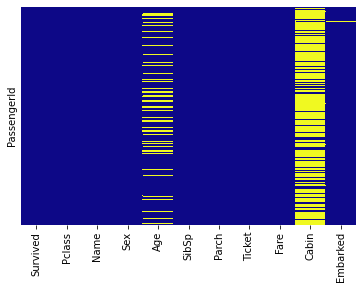

In [4]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels = False, cbar= False, cmap = "plasma")

In [5]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


4. Results from checking null values showed that Cabin, Embarked and Age attributes have quite a number of null values. Checking by the intensity of the heatmap, embarked has more missing values and would therefore be dropped

5. The age attribute also has missing values but from the correlation dataframe, the age has a moderate corellation with the Pclass attribute thus the Pclass would be used to calculate and input data for the age missing, whilst the instances with null values in embarked column will be dropped.

<AxesSubplot:xlabel='Survived', ylabel='count'>

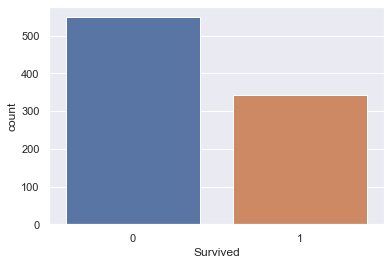

In [6]:
sns.set_theme(style = "darkgrid")
sns.countplot(x = "Survived",data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

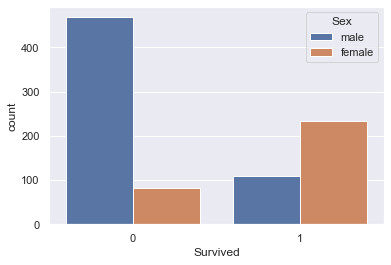

In [7]:
sns.set_theme(style = "darkgrid")
sns.countplot(x = "Survived",  hue = "Sex",data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

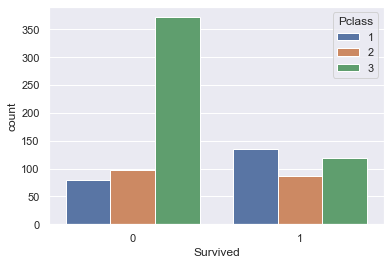

In [8]:
sns.set_style(style="darkgrid")
sns.countplot(x = "Survived",hue = "Pclass",data =df)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

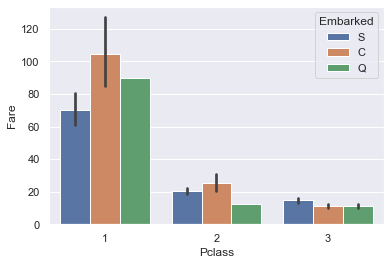

In [9]:
sns.set_style(style="darkgrid")
sns.barplot(y = "Fare",x= "Pclass", hue = "Embarked",data =df)

In [10]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

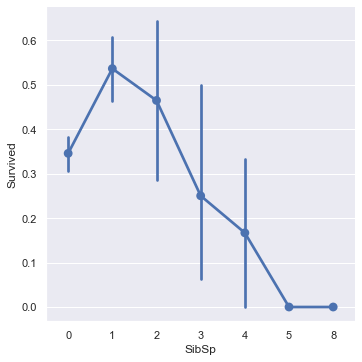

In [11]:
sns.catplot(x = "SibSp", y = "Survived",kind = "point", data = df)

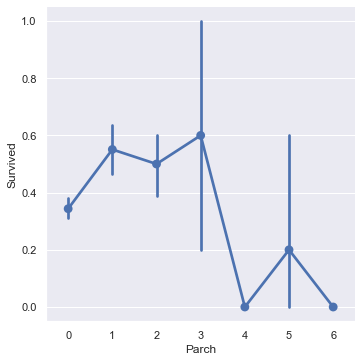

In [12]:
sns.catplot(x = "Parch", y = "Survived",kind = "point", data = df)

## Conclusively from data exploration
6. A few attributes have been selected and checked using various plots

7. The sex and class attributes did have  an effect on the survival chances of a passenger

8. The Parch and SibSp attributes shows the likelihood of a passenger surviving if they had a family member aboard thus both attributes will be combined

## DATA CLEANING

1. There are some missing values in the Age, Cabin and Embarked columns from the heatmap used to visualise missing data in the dataset, thus it becomes important to clean the dataset to give a more efficient result


In [15]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df1 = df.drop("Cabin", axis = 1)
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 108.9+ KB


In [18]:
c = (714)/(891)
print("The percentage of non-missing value in the Age column is", c ,"%")


The percentage of non-missing value in the Age column is 0.8013468013468014 %


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

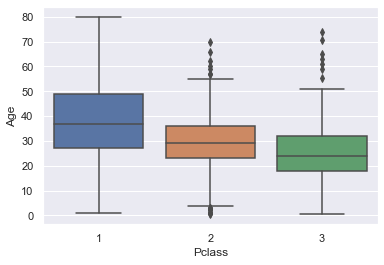

In [19]:
sns.set_theme(style="darkgrid")
sns.boxplot(x = "Pclass",y= "Age",data =df )



In [20]:
medians = df.groupby(['Pclass'])['Age'].median()
medians.iloc[0:3]

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [21]:
meansa = df.groupby(['Pclass'])['Age'].mean()
meansa.iloc[0:3]

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [22]:
medians1 = df.groupby(['Embarked'])['Age'].median()
medians1.iloc[0:3]

Embarked
C    29.0
Q    27.0
S    28.0
Name: Age, dtype: float64

I tried to check if there is any relationship between the age and passenger class as well as age and where they embarked and it turns out that passenger class relationship is more concise and thus I would be filling the null values with the values depending on their passenger class

In [24]:
def Agefill(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return medians.iloc[0]
        elif pclass == 2:
            return medians.iloc[1]
        elif pclass == 3:
            return medians.iloc[2]
        else:
            return medians.mean()
    else:
        return age


In [25]:
df1.Age = df1[["Age","Pclass"]].apply(Agefill,axis = 1)
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 108.9+ KB


In [27]:
c = df1[df1.Embarked.isnull()]
c

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


The data above shows that all other attributes except the name and the age are the same thus this instance could have been a duplicate or wrongly imputed value

In [28]:
df1.drop(df1[df1.Embarked.isna()].index, inplace=True)

In [29]:
df1[df1.duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,


In [30]:
df1["Family"] = df1["SibSp"] + df1["Parch"]

In [31]:
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,3


### Preparing the data for modeling
1. Now that the data is clean, we can describe the X and y values for the ML models

2. The Pclass attribute is a ordinal categorical data and would be left as it is in the dataframe

3. The Sex and Embarked column would be transformed using OneHotEncoder

4. Further ahead a pipeline would be created where continous variables would be standardized.

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [33]:

instances = df1[["Pclass","Family","Age","Fare","Sex","Embarked"]]
target = df1["Survived"]

In [34]:
instances = pd.get_dummies(instances,drop_first=True)

In [35]:
instances

,Pclass,Family,Age,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,
1,3,1,22.0,7.2500,1,0,1
2,1,1,38.0,71.2833,0,0,0
3,3,0,26.0,7.9250,0,0,1
4,1,1,35.0,53.1000,0,0,1
5,3,0,35.0,8.0500,1,0,1
...,...,...,...,...,...,...,...
887,2,0,27.0,13.0000,1,0,1
888,1,0,19.0,30.0000,0,0,1
889,3,3,24.0,23.4500,0,0,1


In [36]:
X = instances.values
y = target.values
X

array([[ 3.,  1., 22., ...,  1.,  0.,  1.],
       [ 1.,  1., 38., ...,  0.,  0.,  0.],
       [ 3.,  0., 26., ...,  0.,  0.,  1.],
       ...,
       [ 3.,  3., 24., ...,  0.,  0.,  1.],
       [ 1.,  0., 26., ...,  1.,  0.,  0.],
       [ 3.,  0., 32., ...,  1.,  1.,  0.]])

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
cltf = ColumnTransformer([("stdsca",StandardScaler(),[1,2,3]),
                          ("nothing","passthrough",[0,4,5,6])
])

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size= 0.25,
                                                stratify=y,
                                                random_state = 1)

<h3> Trying Out Various Algorithms to create a model </h3>

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [40]:
pipe1 = Pipeline([("colstd",cltf),
                  ("lr",LogisticRegression(C = 1,random_state=1))
    
])

pipe1.fit(X_train,y_train)

Pipeline(steps=[('colstd',
                 ColumnTransformer(transformers=[('stdsca', StandardScaler(),
                                                  [1, 2, 3]),
                                                 ('nothing', 'passthrough',
                                                  [0, 4, 5, 6])])),
                ('lr', LogisticRegression(C=1, random_state=1))])

In [41]:
pipe1.score(X_test,y_test)

0.8026905829596412

In [42]:
from sklearn.decomposition import PCA

In [43]:
pipe2 = Pipeline([("colstd",cltf),
                  ("pca",PCA(n_components= 2)),
                  ("lr",LogisticRegression(C = 1,random_state=1))
    
])

In [44]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('colstd',
                 ColumnTransformer(transformers=[('stdsca', StandardScaler(),
                                                  [1, 2, 3]),
                                                 ('nothing', 'passthrough',
                                                  [0, 4, 5, 6])])),
                ('pca', PCA(n_components=2)),
                ('lr', LogisticRegression(C=1, random_state=1))])

In [45]:
pipe2.score(X_test,y_test)

0.695067264573991

In [46]:
pipe3 = Pipeline([("colstd",cltf),
                  ("svc",SVC(C = 100,kernel="linear"))
    
])

In [47]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('colstd',
                 ColumnTransformer(transformers=[('stdsca', StandardScaler(),
                                                  [1, 2, 3]),
                                                 ('nothing', 'passthrough',
                                                  [0, 4, 5, 6])])),
                ('svc', SVC(C=100, kernel='linear'))])

In [48]:
pipe3.score(X_test,y_test)

0.7937219730941704

In [49]:
pipe4 = Pipeline([("colstd",cltf),
                  ("svc",SVC(kernel="rbf"))
    
])

In [50]:
pipe4.fit(X_train,y_train)

Pipeline(steps=[('colstd',
                 ColumnTransformer(transformers=[('stdsca', StandardScaler(),
                                                  [1, 2, 3]),
                                                 ('nothing', 'passthrough',
                                                  [0, 4, 5, 6])])),
                ('svc', SVC())])

In [51]:
pipe4.score(X_test,y_test)

0.8295964125560538

In [52]:
tree = DecisionTreeClassifier(max_depth= 4)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [53]:
tree.score(X_test,y_test)

0.8161434977578476

In [54]:
pipe5 = Pipeline([("colstd",cltf),
                  ("tre",DecisionTreeClassifier(max_depth= 4))
    
])

In [55]:
pipe5.fit(X_train,y_train)

Pipeline(steps=[('colstd',
                 ColumnTransformer(transformers=[('stdsca', StandardScaler(),
                                                  [1, 2, 3]),
                                                 ('nothing', 'passthrough',
                                                  [0, 4, 5, 6])])),
                ('tre', DecisionTreeClassifier(max_depth=4))])

In [56]:
pipe5.score(X_test,y_test)

0.8161434977578476

In [57]:
neig = KNeighborsClassifier(n_neighbors=5)
neig.fit(X_train,y_train)
neig.score(X_test,y_test)

0.7085201793721974

In [58]:
pipe6 = Pipeline([("colstd",cltf),
                 ("neig",KNeighborsClassifier(n_neighbors=5))
                 
])

In [59]:
pipe6.fit(X_train,y_train)
pipe6.score(X_test,y_test)

0.8340807174887892

In [64]:
pipe7 = Pipeline([("colstd",cltf),
                 ("ranfor",RandomForestClassifier(n_estimators = 100))
                 
])

In [65]:
pipe7.fit(X_train,y_train)
pipe7.score(X_test,y_test)

0.8475336322869955